In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv('./input/training.csv')
df_test = pd.read_csv("./input/test.csv")

In [3]:
print('df_train.shape', df_train.shape)
df_train.head()

df_train.shape (7049, 31)


,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [4]:
print('df_test.shape', df_test.shape)
df_test.head()

df_test.shape (1783, 2)


,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


# Missing data

In [5]:
df_test.isnull().sum()

ImageId    0
Image      0
dtype: int64

In [6]:
df_train.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [7]:
pd.DataFrame(df_train['left_eye_inner_corner_x'][df_train['left_eye_inner_corner_x'].isnull()])

,left_eye_inner_corner_x
1654,NaN
1685,NaN
1738,NaN
1742,NaN
1866,NaN
1956,NaN
2036,NaN
2101,NaN
2137,NaN
2153,NaN


In [8]:
pd.DataFrame(df_train['right_eye_center_y'][df_train['right_eye_center_y'].isnull()])

,right_eye_center_y
1620,NaN
1643,NaN
1687,NaN
1834,NaN
1866,NaN
1912,NaN
1938,NaN
2090,NaN
2095,NaN
2099,NaN


In [9]:
# Option A: forward fill (ffill)
# df_train.fillna(method = 'ffill', inplace = True)

# Option B: remove rows with Nan
df_train.dropna(axis = 0, how = 'any', inplace = True)

### Check missing data again

In [10]:
df_train.isnull().sum().sum()

0

In [11]:
pd.DataFrame(df_train['right_eye_center_y'][2094:2100])

,right_eye_center_y
2231,37.777518
2232,40.781992
2234,39.654769
2235,38.737095
2236,39.459740
2238,39.831540


In [12]:
pd.DataFrame(df_train['left_eye_inner_corner_x'][2226:2288])

,left_eye_inner_corner_x


In [13]:
print('df_train.shape', df_train.shape)
df_train.head()

df_train.shape (2140, 31)


,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


# Separate labels (y_train) & images (x_train) from df_train

In [14]:
x_train = pd.DataFrame(df_train['Image'])
y_train = df_train.drop('Image', axis = 1)

In [15]:
print('y_train.shape', y_train.shape)
y_train.head()

y_train.shape (2140, 30)


,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


In [16]:
print('x_train.shape', x_train.shape)
x_train.head()

x_train.shape (2140, 1)


,Image
0,238 236 237 238 240 240 239 241 241 243 240 23...
1,219 215 204 196 204 211 212 200 180 168 178 19...
2,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,147 148 160 196 215 214 216 217 219 220 206 18...


In [17]:
# Split(' ')
# x_train.shape (2140,1) -> (2140, 9216) 96x96 pixels

train_images = []
for i in x_train['Image']:
    train_images.append([0 if x == ' ' else x for x in i.split(' ')])

x_train = pd.DataFrame(train_images, dtype=float)

In [18]:
print('x_train.shape', x_train.shape)
x_train.head()

x_train.shape (2140, 9216)


,0,1,2,3,4,5,6,7,8,9,...,9206,9207,9208,9209,9210,9211,9212,9213,9214,9215
0,238.0,236.0,237.0,238.0,240.0,240.0,239.0,241.0,241.0,243.0,...,33.0,29.0,30.0,34.0,39.0,49.0,62.0,70.0,75.0,90.0
1,219.0,215.0,204.0,196.0,204.0,211.0,212.0,200.0,180.0,168.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,144.0,142.0,159.0,180.0,188.0,188.0,184.0,180.0,167.0,132.0,...,64.0,60.0,56.0,61.0,70.0,69.0,71.0,78.0,78.0,77.0
3,193.0,192.0,193.0,194.0,194.0,194.0,193.0,192.0,168.0,111.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,147.0,148.0,160.0,196.0,215.0,214.0,216.0,217.0,219.0,220.0,...,33.0,34.0,37.0,37.0,43.0,46.0,83.0,140.0,170.0,176.0


In [19]:
x_train[x_train == 0].any().any()

False

In [20]:
x_train.isnull().sum().sum()

0

# Separate images (x_test) from df_test

In [21]:
print('df_test.shape', df_test.shape)
df_test.head()

df_test.shape (1783, 2)


,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [22]:
x_test = df_test.drop('ImageId', axis = 1)

In [23]:
print('x_test.shape', x_test.shape)
x_test.head()

x_test.shape (1783, 1)


,Image
0,182 183 182 182 180 180 176 169 156 137 124 10...
1,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,177 176 174 170 169 169 168 166 166 166 161 14...
3,176 174 174 175 174 174 176 176 175 171 165 15...
4,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [24]:
# Split(' ')
# x_test.shape (1783,1) -> (1783, 9216) 96x96 pixels

test_images = []
for i in x_test['Image']:
    test_images.append([0 if x == ' ' else x for x in i.split(' ')])

x_test = pd.DataFrame(test_images, dtype=float)

In [25]:
print('x_test.shape', x_test.shape)
x_test.head()

x_test.shape (1783, 9216)


,0,1,2,3,4,5,6,7,8,9,...,9206,9207,9208,9209,9210,9211,9212,9213,9214,9215
0,182.0,183.0,182.0,182.0,180.0,180.0,176.0,169.0,156.0,137.0,...,6.0,14.0,28.0,28.0,24.0,18.0,12.0,8.0,5.0,5.0
1,76.0,87.0,81.0,72.0,65.0,59.0,64.0,76.0,69.0,42.0,...,156.0,152.0,162.0,169.0,168.0,159.0,191.0,228.0,211.0,168.0
2,177.0,176.0,174.0,170.0,169.0,169.0,168.0,166.0,166.0,166.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,176.0,174.0,174.0,175.0,174.0,174.0,176.0,176.0,175.0,171.0,...,144.0,143.0,141.0,142.0,143.0,142.0,142.0,142.0,142.0,140.0
4,50.0,47.0,44.0,101.0,144.0,149.0,120.0,58.0,48.0,42.0,...,254.0,254.0,254.0,253.0,255.0,236.0,174.0,175.0,175.0,165.0


In [26]:
x_test[x_test == 0].any().any()

False

In [27]:
x_test.isnull().sum().sum()

0

# Data Preprocessing

## 1) Normalize x_train, x_test

In [28]:
# from range [0-255] to [0-1]
x_train = x_train / 255.0
x_test = x_test / 255.0

## 2) Reshape x_train, x_test

In [29]:
print('Before reshape')
print('x_train.shape', x_train.shape)
print('x_test.shape', x_test.shape)
x_train = x_train.values.reshape(x_train.shape[0], 96, 96, 1)
x_test = x_test.values.reshape(x_test.shape[0], 96, 96, 1)
print('-'*50)
print('After reshape')
print('x_train.shape', x_train.shape)
print('x_test.shape', x_test.shape)

Before reshape
x_train.shape (2140, 9216)
x_test.shape (1783, 9216)
--------------------------------------------------
After reshape
x_train.shape (2140, 96, 96, 1)
x_test.shape (1783, 96, 96, 1)


# Data Visualization

In [30]:
x_train[0].shape

(96, 96, 1)

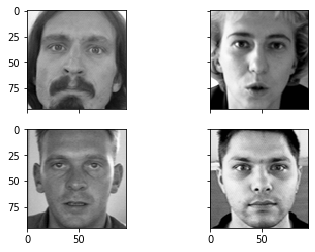

In [31]:
f,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex='col',sharey='row')
ax1.imshow(x_train[0].reshape(96,96), cmap='gray')
ax2.imshow(x_train[1].reshape(96,96), cmap='gray')
ax3.imshow(x_train[2].reshape(96,96), cmap='gray')
ax4.imshow(x_train[3].reshape(96,96), cmap='gray')

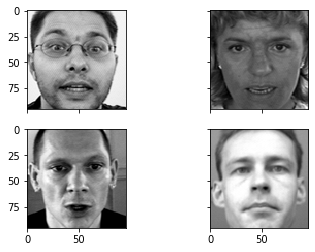

In [32]:
f,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex='col',sharey='row')
ax1.imshow(x_test[0].reshape(96,96), cmap='gray')
ax2.imshow(x_test[1].reshape(96,96), cmap='gray')
ax3.imshow(x_test[2].reshape(96,96), cmap='gray')
ax4.imshow(x_test[3].reshape(96,96), cmap='gray')

# Split training and valdiation set

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=0)

# CNN

In [34]:
from keras import backend as K

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D
from keras.layers.advanced_activations import LeakyReLU

from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


## 1) Define model architecture

    IN > ( (Conv2D>BN>relu)*2 > MaxPool2D )*2 > Flatten > Dense > BN > relu > dropout > OUT

In [35]:
def Create_model ():
    
    pixel = 96

    model=Sequential()

    model.add(Conv2D(32,(3,3), padding='same', input_shape=(pixel,pixel,1)))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))

    model.add(Conv2D(32,(3,3), padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Conv2D(64,(3,3), padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))

    model.add(Conv2D(64,(3,3), padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(Dense(30))   # y_train.shape[1]
    
    return model

## 2) Create model

In [36]:
model = Create_model()
model.summary()

W0830 12:09:54.001294  3412 deprecation_wrapper.py:119] From D:\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0830 12:09:54.264929  3412 deprecation_wrapper.py:119] From D:\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0830 12:09:54.349946  3412 deprecation_wrapper.py:119] From D:\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0830 12:09:54.557449  3412 deprecation_wrapper.py:119] From D:\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0830 12:09:54.557449  3412 deprecation_

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 96, 96, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 96, 96, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
__________

## 3) Compile the model

In [37]:
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mae'])

W0830 12:09:55.466393  3412 deprecation_wrapper.py:119] From D:\Anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



## 4) Fit the model

In [38]:
history = model.fit(x = x_train, y = y_train, epochs = 25, batch_size = 64,
                    validation_data = (x_val, y_val))

Train on 1926 samples, validate on 214 samples
Epoch 1/25
1926/1926 [==============================] - 148s 77ms/step - loss: 2333.8787 - mean_absolute_error: 44.4291 - val_loss: 1616.8611 - val_mean_absolute_error: 35.2834
Epoch 2/25
1926/1926 [==============================] - 158s 82ms/step - loss: 1690.5155 - mean_absolute_error: 36.4879 - val_loss: 918.3597 - val_mean_absolute_error: 24.1324
Epoch 3/25
1926/1926 [==============================] - 160s 83ms/step - loss: 1115.2987 - mean_absolute_error: 28.0013 - val_loss: 739.0807 - val_mean_absolute_error: 21.0980
Epoch 4/25
1926/1926 [==============================] - 174s 90ms/step - loss: 672.1279 - mean_absolute_error: 20.1114 - val_loss: 254.2870 - val_mean_absolute_error: 11.9079
Epoch 5/25
1926/1926 [==============================] - 167s 87ms/step - loss: 380.3566 - mean_absolute_error: 14.0646 - val_loss: 280.3061 - val_mean_absolute_error: 12.0577
Epoch 6/25
1926/1926 [==============================] - 150s 78ms/step - l

In [39]:
print(history.history.keys())

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])


# Model Evaluation (df_train)

## 1) Plot loss and accuracy

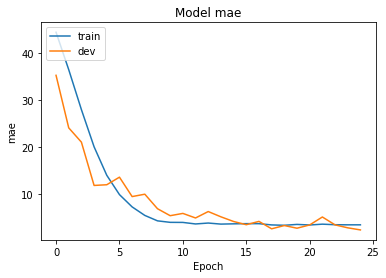

In [40]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.xlabel('Epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.title('Model mae')
plt.ylabel('mae')
plt.show()

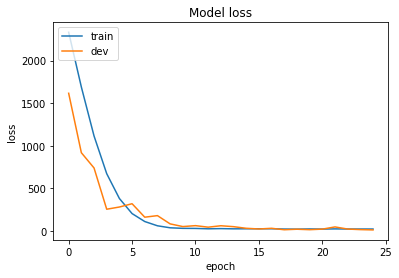

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()

## 2) Loss and accuracy on validation set

In [42]:
score = model.evaluate(x_val, y_val)
print("loss:", score[0])
print("metric (mae): ", score[1])

214/214 [==============================] - 5s 22ms/step
loss: 11.160088788683169
metric (mae):  2.4680450742489826


# Prediction (x_test)

In [43]:
y_pred = model.predict(x_test)

In [44]:
lookup = pd.read_csv('./input/IdLookupTable.csv')
lookup.head(5)

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN


In [45]:
y_train.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [47]:
#code for preparation of submission file
FeatureName = list(y_train.columns)

indexes = []
for i in lookup['FeatureName']:
    indexes.append(FeatureName.index(i))
imageid = []
for i in lookup['ImageId']:
        imageid.append(i-1)
location = []
for image,feature in zip(imageid, indexes):
    location.append(y_pred[image][feature])

rowid = range(1,len(location)+1)
rowid = pd.Series(rowid, name='RowId')
location = pd.Series(location, name='Location')

submission=pd.concat([rowid, location], axis=1)
submission.to_csv('./output/submission_facial.csv', index=False)

# Save model architecture (.json) and model weights (.h5)

In [48]:
# Save model architecture (.json)

model_json = model.to_json()
with open("./model/modelarchitecture.json", "w") as json_file:
    json_file.write(model_json)

In [49]:
# Save model weights (.h5)

model.save_weights("./model/modelweights.h5")

# Plot Model png

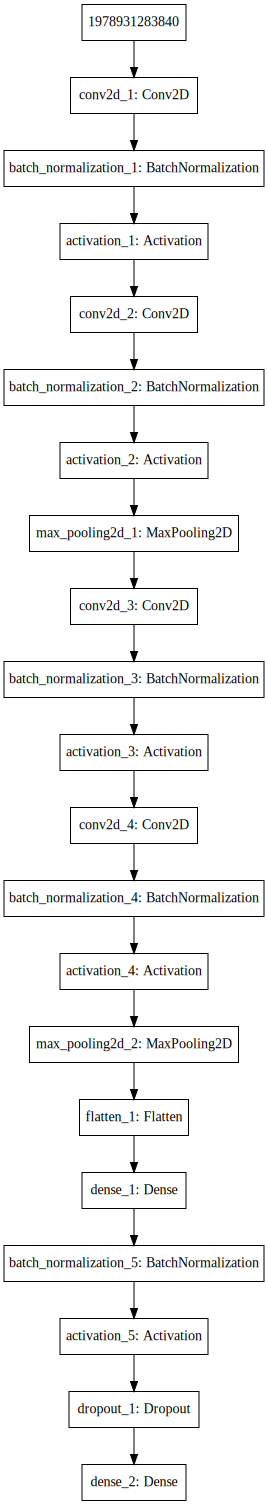

In [50]:
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

plot_model(model, to_file='./model/model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))